# SVM et Sélection d'attribut



## Variables d'environement

Pensez à vérifier les variables d'environement:

In [1]:
import sys

print(sys.version)
print(sys.path)

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]
['', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '/usr/local/lib/python3.5/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.5/dist-packages/IPython/extensions', '/home/ethiy/.ipython']


## Séparation linéaire

Le but de cette partie est de comparer le SVM linéaire à un autre exemple de classifieur linéaire: le Perceptron. On commence d'abords par rappeler rapidement le principe du Perceptron.

### Perceptron

L'algorithm du Perceptron date des [travaux de Frank Rosenblatt](http://psycnet.apa.org/record/1959-09865-001). Le but était de modéliser l'action des neurones. Ce modèle va être ensuite utilisé pour contruire des réseaux de neurones complexes et c'est la base de toute les méthodes de Deep Learning. Le modèle donne pour chaque attribut $i \in \{1,2, \dots,d\}$ de la donnée d'entrée $x = \begin{pmatrix}x_1\\ x_2\\ \vdots \\x_d\end{pmatrix}$ un poids $w_i$. Pour chaque entrée $x$ on lui applique linéairement un vecteur de poids $w = \begin{pmatrix}w_1\\ w_2\\ \vdots \\w_d\end{pmatrix}$ pour lui attribuer un score $s = \langle w \vert x\rangle = \sum_{i=1,\dots,d}w_i.x_i$. Suite à ce score obtenu, on prends une décision:
* si $s < c \in \mathbb{R}$, on choisit la classe $0$;
* si $s \geq c $, on choisit la classe $1$

On peut écrire donc ce classifieur autrement:

$$D_{perceptron}(x) \triangleq \mathbb{1}_{\langle w \vert x\rangle + b \geq 0}$$

où $b = -c$ et $\mathbb{1}_A(x) = \begin{cases}1 & , x \in A\\0 & , x \notin A\end{cases}$.

Si on cherche à rammener les classes à la convention SVM (i.e. $y=\pm1$), avec une simple transformation affine, on a:
$$\widetilde{D}_{perceptron}(x) \triangleq 2.\mathbb{1}_{\langle w \vert x \rangle + b \geq 0} - 1 = sign(\langle w \vert x \rangle + b \geq 0)$$

### Régression logistique

Le modèle de régression logistique est proche des méthodes génératives. Ce Modèle permet juste de donner une relation entre les probabilités par classe et non pas les distributions en elle même:
$$ \ln \Big( \frac{p(x \vert y=1)}{p(x \vert y=0)}\Big) = \langle w \vert x \rangle + b$$

1. 
    a. En appliquant la règle de Bayes, montrer que: $$\ln\Big(\frac  {p(y=1\vert x)}{1-p(y=1\vert x)}\Big) = \ln\Big(\frac{p(y=1)}{p(y=0)}\Big) + b +\langle w \vert x \rangle$$
    b. Montrer donc que le décideur de la régression logistique est:
$$D_{logistic} = \sigma(\tilde b +\langle w \vert x \rangle)$$
où: $\sigma(t) \triangleq \frac{1}{1 + e^{-t}} \quad ,\forall t \in \mathbb{R}$

2. Ecrire un code python qui trace les deux fonctions, avec de multiple valeurs de $\lambda$, $t \mapsto \sigma(\lambda.t)$ et $t \mapsto \mathbb{1}_{t \geq 0}$, dans une même figure. A la lumière de la figure obtenue, discuter les deux fonctions de décisions.

#### Réponse

1. a. 

   b. 

2. 

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-20, 20, 1000)

lambdas = [.1, 1, 10]
colors = ['k', 'b', 'r']

# Utiliser 'plt' pour tracer les courbes qui correspondent à \sigma avec les lambda données et la fonctions Heavyside

plt.show()

### Comparaison

On rappelle ici que le SVM linéaire a pour but de maximiser la marge entre deux classes, contrairement au Perceptron et à la régression logistique. Les problèmes à optimiser ne se ressemble plus.

Le but du code, ci-dessous, est d'illustrer cette différence.

1. a. Qu'est ce que fait ce bout de code?

   b. Commentez le résultat du programme suivant.

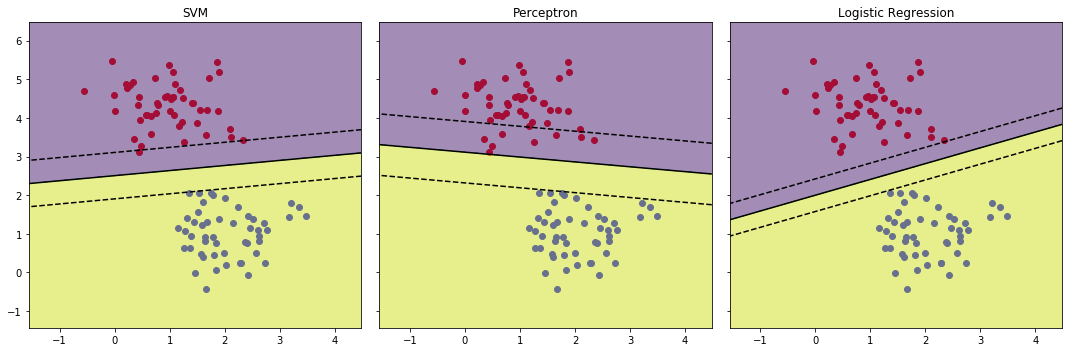

In [38]:
import sklearn.datasets
import sklearn.linear_model


def plot_points(points, ax, color):
    ax.scatter(points[:, 0], points[:, 1], c=color)
    

def plot_dataset(X, Y, ax):
    for x, col in zip([X[Y==0], X[Y==1]], ['r', 'b']):
        plot_points(x, ax, col)
        

def mesh_from(instances, gap=.2):
    return np.meshgrid(
        np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, gap),
        np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, gap),
    )


def plot_contours(xx, yy, ax, classifier, **parameters):
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, **parameters)


def plot_margin(xx, yy, ax, classifier, **parameters):
    Z = np.empty(xx.shape)
    for (i, j), value in np.ndenumerate(xx):
        Z[i, j] = classifier.decision_function([[value, yy[i, j]]])[0]
    ax.contour(xx, yy, Z, [-1.0, 0.0, 1.0], colors='k', linestyles=['dashed', 'solid', 'dashed'])


X, Y = sklearn.datasets.make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)
xx, yy = mesh_from(X, .01)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.set_figheight(5)
f.set_figwidth(15)

for ax, loss , title in zip([ax1, ax2, ax3], ['hinge', 'perceptron', 'log'], ['SVM', 'Perceptron', 'Logistic Regression']):
    plot_dataset(X, Y, ax)
    model = sklearn.linear_model.SGDClassifier(alpha=0.01, max_iter=100, loss=loss).fit(X, Y)
    plot_contours(
        xx,
        yy,
        ax,
        model,
        cmap=plt.cm.viridis,
        alpha=0.5
    )
    plot_margin(
        xx,
        yy,
        ax,
        model
    )
    ax.set_title(title)

plt.tight_layout()
plt.show()

#### Réponse:

1. a. 

   b. 
   

### Pénalisation vs Généralisation

1. a. Entraîner des SVM linéaire avec différentes constantes de pénalisation $C$ sur les mêmes données.

   b. Tracer la marge selon les valeurs de la constante $C$.
   
   c. Commenter les résultats.

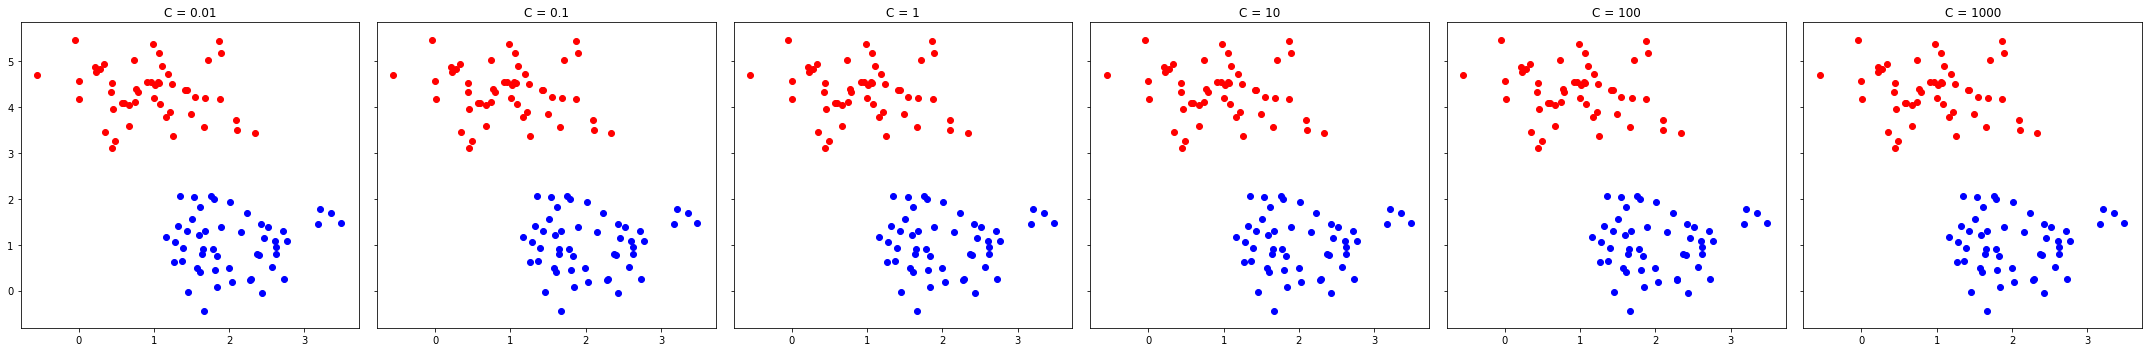

In [37]:
import sklearn.svm

C = [.01, .1, 1, 10, 100, 1000]

f, axes = plt.subplots(1, len(C), sharey=True)
f.set_figheight(5)
f.set_figwidth(30)

for c, ax in zip(C, list(axes)):
    plot_dataset(X, Y, ax)
    # Entraîner le modèle
    # Tracer les contours et la marge
    ax.set_title('C = ' + str(c))

plt.tight_layout()
plt.show()

#### Réponse:

1. a. 

   b. 
   
   c.
   

### Kernel SVM

1. a. Relancer le même code mais cette fois-ci avec le kernel polynomial et le kernel rbf en jouant sur le $gamma$ sur les données suivantes.

   b. Commenter les résultats.
   

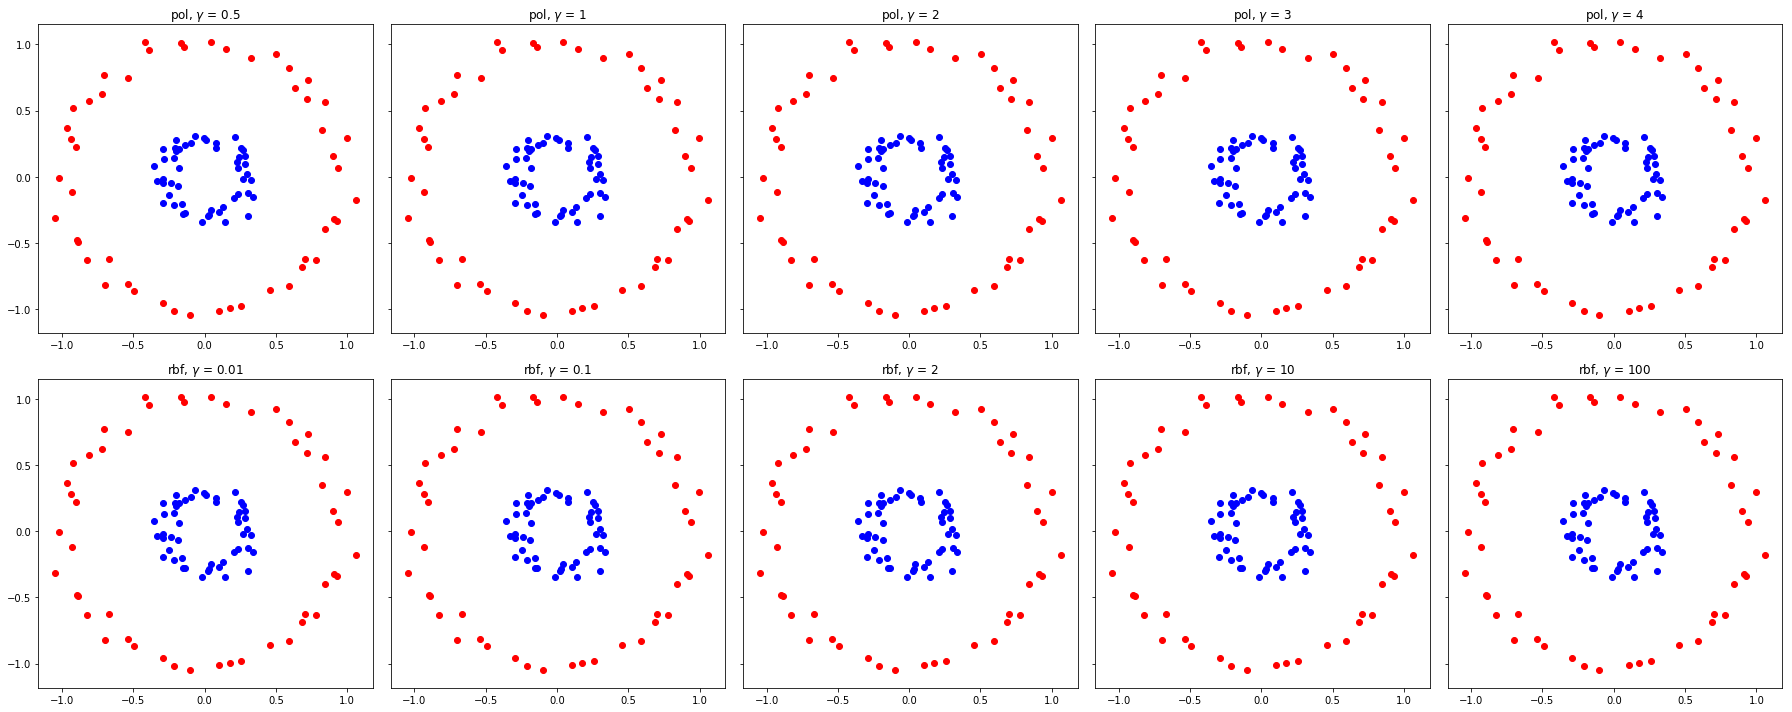

In [40]:
X, Y = sklearn.datasets.make_circles(n_samples=100, factor=.3, noise=.05)
xx, yy = mesh_from(X, .01)

gammas = [.5, 1, 2, 3, 4]

f, axes = plt.subplots(2, len(gammas), sharey=True)
f.set_figheight(10)
f.set_figwidth(25)

for gamma, ax in zip(gammas, list(axes[0, :])):
    plot_dataset(X, Y, ax)
    # Entraîner le modèle
    # Tracer les contours et la marge
    ax.set_title('pol, $\gamma$ = ' + str(gamma))

gammas = [.01, .1, 2, 10, 100]
for gamma, ax in zip(gammas, list(axes[1, :])):
    plot_dataset(X, Y, ax)
    # Entraîner le modèle
    # Tracer les contours et la marge
    ax.set_title('rbf, $\gamma$ = ' + str(gamma))

plt.tight_layout()
plt.show()

#### Réponse:

1. a. 

   b. 
   

## Cross Validation



In [ ]:
import sklearn.model_selection



## SVM vs Random Forest

## Selection d'attribut

### OCS

### Selectionner